In [221]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer
import math
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import gensim
import string
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [222]:
# Read the training and testing datasets
train_path = "../data/data-clean/cleaned_train.csv"
test_path = "../data/data-clean/all_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

# Toxicity

In [223]:
feature = train_df[['comment_text']]
output = train_df[['target']] 
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)

# Bag of Word

In [224]:
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [225]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['target'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['target'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.021301735541551493
Mean Squared Error on cv set:  0.02397234821183853
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.020187745747408
Mean Squared Error on cv set:  0.023894940691662606
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.023940442717061992
Mean Squared Error on cv set:  0.02422141779019278
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.020186051979007993
Mean Squared Error on cv set:  0.023818922188843426
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.02909288695036151
Mean Squared Error on cv set:  0.02782895574230912
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.020908162318483706
Mean Squared Error on cv set:  0.024109229014630078
******************************************

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.02967374092432311
Mean Squared Error on cv set:  0.029106033034820948
**************************************************
1 l1 :
Mean Squared Error on train set:  0.03444396879693943
Mean Squared Error on cv set:  0.032659363512716214
**************************************************
1 l2 :
Mean Squared Error on train set:  0.03338132026902377
Mean Squared Error on cv set:  0.0317720460179497
**************************************************
10 l1 :
Mean Squared Error on train set:  0.03444519707716906
Mean Squared Error on cv set:  0.03266054979417408
**************************************************
10 l2 :
Mean Squared Error on train set:  0.03405565735637127
Mean Squared Error on cv set:  0.032334398143642605
**************************************************
100 l1 :
Mean Squared Error on train set:  0.03444567431336582
Mean Squared Error on cv set:  0.03266101071620149
**************************************************
100 l2 :
Mean Squared E

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [226]:
# Best models parameters:
best_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [227]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
stupid,0.265918
idiot,0.174433
crap,0.110604
fuck,0.094270
ridicul,0.092633
ignor,0.087252
damn,0.080521
fool,0.078997
shit,0.078063
dumb,0.074975


In [228]:
test_preds = best_model.predict(bow_test)

In [229]:
test_df['predicted_target'] = test_preds

# obscene

In [230]:
feature = train_df[['comment_text']]
output = train_df[['obscene']] 

In [231]:
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [232]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['obscene'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['obscene'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.004055854560506592
Mean Squared Error on cv set:  0.00369254233309507
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.0038859124105428914
Mean Squared Error on cv set:  0.0037023193991653977
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.004545067017722812
Mean Squared Error on cv set:  0.003740819106245919
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.0038899954049139017
Mean Squared Error on cv set:  0.003701825353546531
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.005362858674954695
Mean Squared Error on cv set:  0.004355586611271022
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.003929571384698392
Mean Squared Error on cv set:  0.003715732717163936
*********************************

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.005115455281972957
Mean Squared Error on cv set:  0.0042583597081831525
**************************************************
1 l1 :
Mean Squared Error on train set:  0.005514862696681508
Mean Squared Error on cv set:  0.004493025088206138
**************************************************
1 l2 :
Mean Squared Error on train set:  0.005444793393860806
Mean Squared Error on cv set:  0.004437251771446595
**************************************************
10 l1 :
Mean Squared Error on train set:  0.005514600628884678
Mean Squared Error on cv set:  0.004492831655628312
**************************************************
10 l2 :
Mean Squared Error on train set:  0.0055104225357790375
Mean Squared Error on cv set:  0.004489982499577426
**************************************************
100 l1 :
Mean Squared Error on train set:  0.0055150410508426504
Mean Squared Error on cv set:  0.004493156828088315
**************************************************
100 l2 :
M

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [233]:
# Best models parameters:
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [234]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
fuck,0.084039
damn,0.067112
crap,0.064931
shit,0.064766
ass,0.048934
stupid,0.044897
idiot,0.042056
suck,0.026438
darn,0.018726
asshol,0.016669


In [235]:
test_preds = best_model.predict(bow_test)
test_df['predicted_obscene'] = test_preds

# identity_attack

In [236]:
feature = train_df[['comment_text']]
output = train_df[['identity_attack']]

In [237]:
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [238]:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['identity_attack'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['identity_attack'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.0032278914056731844
Mean Squared Error on cv set:  0.003719445829179769
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.003044567697657055
Mean Squared Error on cv set:  0.003767264137934828
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.003688731623915319
Mean Squared Error on cv set:  0.0036995299678229373
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.0030438650907320774
Mean Squared Error on cv set:  0.0037542549311084415
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.0042052768111988156
Mean Squared Error on cv set:  0.004044983255588214
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.0030655323441104525
Mean Squared Error on cv set:  0.0037562730304083343
****************************

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.004979696641968088
Mean Squared Error on cv set:  0.004608436289902765
**************************************************
1 l2 :
Mean Squared Error on train set:  0.004780912399400287
Mean Squared Error on cv set:  0.004499626736692189
**************************************************
10 l1 :
Mean Squared Error on train set:  0.00497978306700227
Mean Squared Error on cv set:  0.00460850270286491
**************************************************
10 l2 :
Mean Squared Error on train set:  0.0049498808845739066
Mean Squared Error on cv set:  0.004593441353430901
**************************************************
100 l1 :
Mean Squared Error on train set:  0.004980157517756622
Mean Squared Error on cv set:  0.004608790575946915
**************************************************
100 l2 :
Mean Squared Error on train set:  0.004974238552750087
Mean Squared Error on cv set:  0.004606004371458
**************************************************


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [239]:
# Best models parameters:
best_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [240]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]
test_preds = best_model.predict(bow_test)
test_df['predicted_identity_attack'] = test_preds

In [241]:
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
white,0.075415
gay,0.063328
black,0.045740
racist,0.039247
muslim,0.031424
christian,0.028233
homosexu,0.024548
women,0.019390
religion,0.018874
church,0.018750


# insult

In [242]:
feature = train_df[['comment_text']]
output = train_df[['insult']] 
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=30000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [243]:
# Performing hyperparameter tuning:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['insult'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['insult'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.015766822929589794
Mean Squared Error on cv set:  0.017609000286762745
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.015238760891764947
Mean Squared Error on cv set:  0.0176193724663667
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.01784041605595123
Mean Squared Error on cv set:  0.017788291322146963
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.015256949571041149
Mean Squared Error on cv set:  0.01760701648196505
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.02197383515539834
Mean Squared Error on cv set:  0.020825023052480893
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.01539994413270884
Mean Squared Error on cv set:  0.01768189873111669
******************************************

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.025982140587286515
Mean Squared Error on cv set:  0.024456585438831797
**************************************************
0.1 l2 :
Mean Squared Error on train set:  0.022405337191656775
Mean Squared Error on cv set:  0.021770042511545382
**************************************************
1 l1 :
Mean Squared Error on train set:  0.025979668563023355
Mean Squared Error on cv set:  0.02445410741980303
**************************************************
1 l2 :
Mean Squared Error on train set:  0.025313803249815286
Mean Squared Error on cv set:  0.02391114497998474
**************************************************
10 l1 :
Mean Squared Error on train set:  0.025979547473831296
Mean Squared Error on cv set:  0.024453986036775833
**************************************************
10 l2 :
Mean Squared Error on train set:  0.025885156280078533
Mean Squared Error on cv set:  0.024372318287450765
**************************************************
100 l1 :
Mean S

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

In [244]:
# Best models parameters:
best_model.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [245]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
stupid,0.248107
idiot,0.162810
ridicul,0.095300
ignor,0.087810
crap,0.076426
fool,0.075796
dumb,0.072084
fuck,0.068325
troll,0.065572
jerk,0.065549


In [246]:
test_preds = best_model.predict(bow_test)
test_df['predicted_insult'] = test_preds

# threat

In [247]:
feature = train_df[['comment_text']]
output = train_df[['threat']] 
X_train, X_val, y_train, y_val = train_test_split(feature, output, test_size=0.25, random_state=5400)
cnt_vec = CountVectorizer(ngram_range=(1, 2), max_features=6000)
bow_train = cnt_vec.fit_transform(X_train['comment_text'])
bow_cv = cnt_vec.transform(X_val['comment_text'])
bow_test = cnt_vec.transform(test_df['text'])

In [248]:
# Performing hyperparameter tuning:
# Performing hyperparameter tuning:
alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
penalty = ['l1', 'l2']
xticks = []
tr_errors = []
cv_errors = []
best_model = None
best_error = 100
for a in alpha:
    for p in penalty:
        xticks.append(str(a) + ' ' + p)
        print(str(a) + ' ' + p + " :")
        
        model = SGDRegressor(alpha=a, penalty=p) 
        model.fit(bow_train, y_train) # Train
        
        preds = model.predict(bow_train) # Get predictions
        err = mean_squared_error(y_train['threat'], preds) # Calculate error on trainset
        tr_errors.append(err)
        print("Mean Squared Error on train set: ", err)
        
        preds = model.predict(bow_cv) # Get predictions on CV set
        err = mean_squared_error(y_val['threat'], preds) # Calculate error on cv set
        cv_errors.append(err)
        print("Mean Squared Error on cv set: ", err)
        
        if err < best_error: # Get best model trained
            best_error = err
            best_model = model
        
        print("*"*50)

1e-05 l1 :
Mean Squared Error on train set:  0.0019062728649344679
Mean Squared Error on cv set:  0.002277270287493406
**************************************************
1e-05 l2 :
Mean Squared Error on train set:  0.0018559938342290624
Mean Squared Error on cv set:  0.002295904701129634
**************************************************
0.0001 l1 :
Mean Squared Error on train set:  0.002057793065330259
Mean Squared Error on cv set:  0.002281875654320382
**************************************************
0.0001 l2 :
Mean Squared Error on train set:  0.001855687051918907
Mean Squared Error on cv set:  0.002293275659353018
**************************************************
0.001 l1 :
Mean Squared Error on train set:  0.0021668466916568065
Mean Squared Error on cv set:  0.0023850619634185125
**************************************************
0.001 l2 :
Mean Squared Error on train set:  0.0018605449583336993
Mean Squared Error on cv set:  0.0022913374494594224
*****************************

/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d arr

Mean Squared Error on train set:  0.002277724381326229
Mean Squared Error on cv set:  0.002521491064670459
**************************************************
10 l2 :
Mean Squared Error on train set:  0.0022727246353362977
Mean Squared Error on cv set:  0.0025170217700773287
**************************************************
100 l1 :
Mean Squared Error on train set:  0.0022776570116044793
Mean Squared Error on cv set:  0.0025214141043348255
**************************************************
100 l2 :
Mean Squared Error on train set:  0.002277680940554228
Mean Squared Error on cv set:  0.002521364189128953
**************************************************


/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/dsan5400/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [249]:
# Best models parameters:
best_model.get_params()

{'alpha': 1e-05,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l1',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [250]:
# Printing the 20 most important features/words which contribute to a comment being toxic.
feat_names = cnt_vec.get_feature_names_out()
weights = best_model.coef_
df = pd.DataFrame(data=weights, columns=['weights'], index=feat_names)
df.sort_values("weights", ascending=False).iloc[0:20,:]

,weights
kill,0.035038
shoot,0.032845
murder,0.020482
shot,0.018945
death,0.017054
arm,0.012520
dead,0.011648
bear,0.010827
hang,0.009411
die,0.008873


In [251]:
test_preds = best_model.predict(bow_test)
test_df['predicted_threat'] = test_preds
test_df.to_csv('../data/data-predict/SGDRegressor_test_predictions.csv', index=False)

# Toxicity EDA

In [252]:
print(test_df['predicted_target'].describe())

count    342.000000
mean       0.065448
std        0.063091
min       -0.020737
25%        0.029852
50%        0.051204
75%        0.078851
max        0.476143
Name: predicted_target, dtype: float64


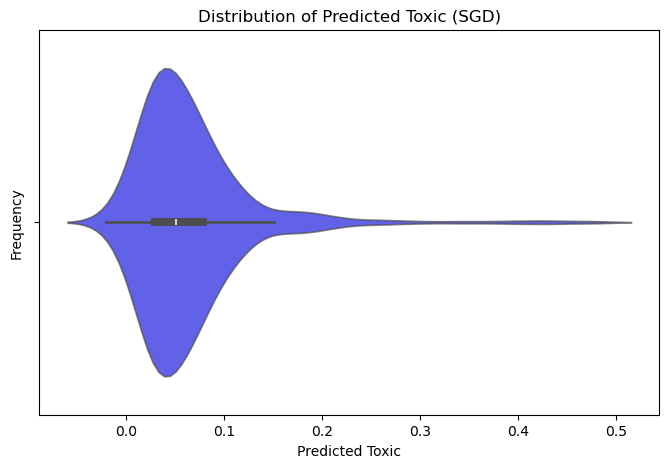

In [253]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_target'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Toxic (SGD)")
plt.xlabel("Predicted Toxic")
plt.ylabel("Frequency")
plt.show()

In [254]:
top_predictions = test_df.sort_values(by='predicted_target', ascending=False).head(10)
print(top_predictions[['text', 'predicted_target']])

low_predictions = test_df.sort_values(by='predicted_target', ascending=True).head(10)
print(low_predictions[['text', 'predicted_target']])

                                                  text  predicted_target
45   liron peopl qrting like dunk peopl dislik ai a...          0.476143
206  contentcatapult runwayml udiomus midjourney do...          0.438672
0    thefrogsoupram bluerei naegiko didnt consent a...          0.415534
251  bletzevan ottomoth sillymizu naegiko noth scar...          0.385346
106  week late discours think hirohiko araki statem...          0.342944
120  monachikosx charismaticgeto alreadi put place ...          0.297772
187  mizosi kjburbankva nah dont give keep fight bs...          0.260387
18   everyon support ai look good monster planet fu...          0.259329
236  ai creator lie shit fuck ugliest soulless bull...          0.223816
84   cocacola ai your kill creativ brown tornado do...          0.223311
                                                  text  predicted_target
42   yle saturday novemb also featur perspect resea...         -0.020737
224  widen use ai think may reach point human made 

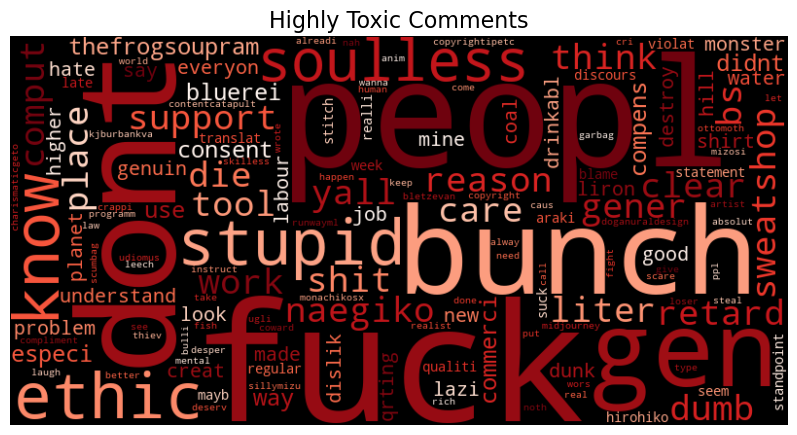

In [255]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.25  # Adjusted threshold

# Select high toxicity comments
high_toxic_comments = test_df[test_df['predicted_target'] > high_toxic_threshold]['text'].values
high_toxic_text = " ".join(high_toxic_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_toxic_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_toxic_text)
else:
    print("No high toxic comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_toxic_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Toxic Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()


## obscene

In [256]:
print(test_df['predicted_obscene'].describe())

count    342.000000
mean       0.019805
std        0.028729
min       -0.008506
25%        0.006083
50%        0.011788
75%        0.019664
max        0.204130
Name: predicted_obscene, dtype: float64


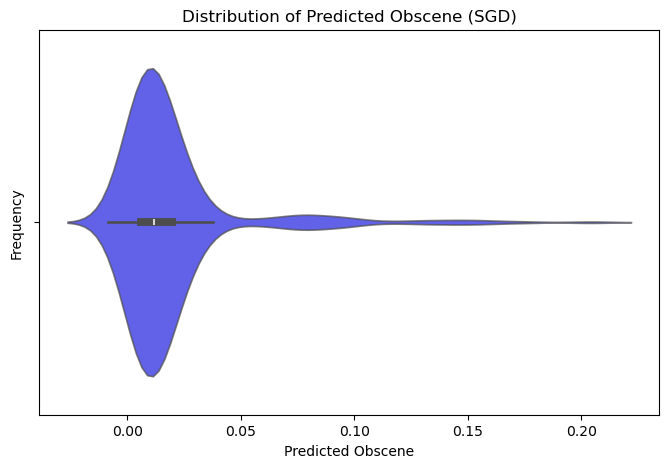

In [257]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_obscene'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Obscene (SGD)")
plt.xlabel("Predicted Obscene")
plt.ylabel("Frequency")
plt.show()

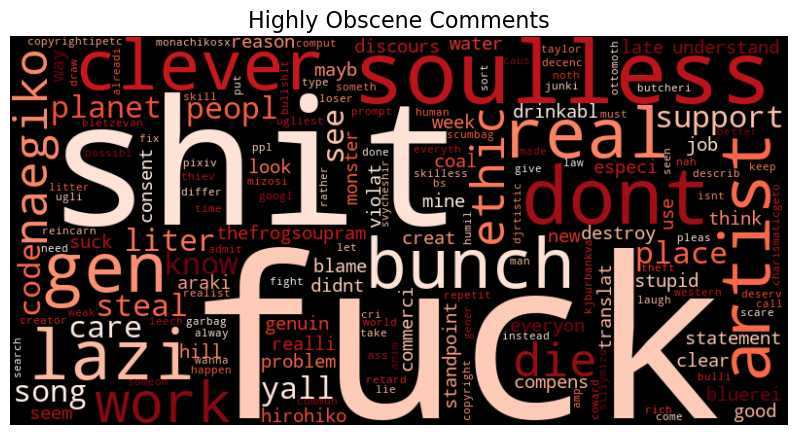

In [258]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.1  # Adjusted threshold

# Select high toxicity comments
high_obscene_comments = test_df[test_df['predicted_obscene'] > high_toxic_threshold]['text'].values
high_obscene_text = " ".join(high_obscene_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_obscene_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_obscene_text)
else:
    print("No high obscene comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_obscene_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Obscene Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

## identity_attack

In [259]:
print(test_df['predicted_identity_attack'].describe())

count    342.000000
mean       0.008374
std        0.010378
min       -0.003841
25%        0.003660
50%        0.006069
75%        0.010023
max        0.142744
Name: predicted_identity_attack, dtype: float64


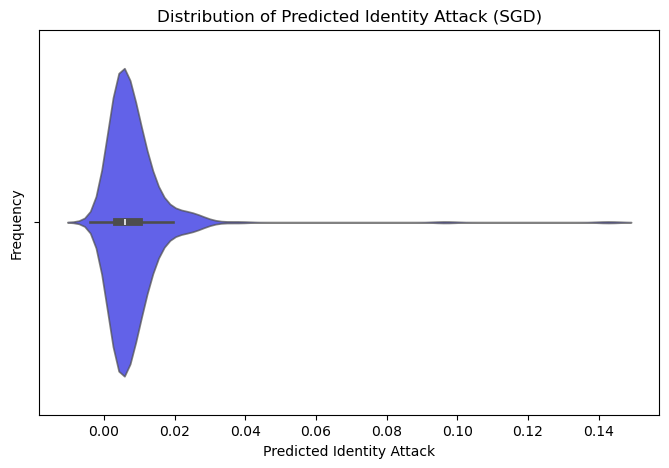

In [260]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_identity_attack'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Identity Attack (SGD)")
plt.xlabel("Predicted Identity Attack")
plt.ylabel("Frequency")
plt.show()

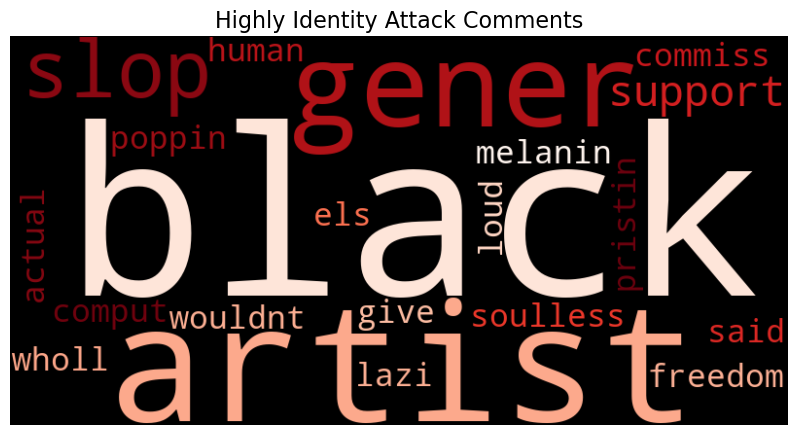

In [261]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.1  # Adjusted threshold

# Select high toxicity comments
high_ia_comments = test_df[test_df['predicted_identity_attack'] > high_toxic_threshold]['text'].values
high_ia_text = " ".join(high_ia_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_ia_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_ia_text)
else:
    print("No high identity attack comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_ia_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Identity Attack Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

## insult

In [262]:
print(test_df['predicted_insult'].describe())

count    342.000000
mean       0.046994
std        0.052045
min       -0.024975
25%        0.020042
50%        0.034789
75%        0.057590
max        0.432967
Name: predicted_insult, dtype: float64


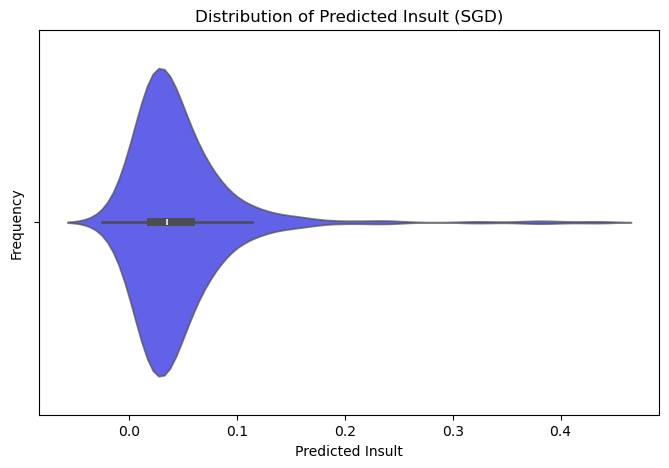

In [263]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_insult'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Insult (SGD)")
plt.xlabel("Predicted Insult")
plt.ylabel("Frequency")
plt.show()

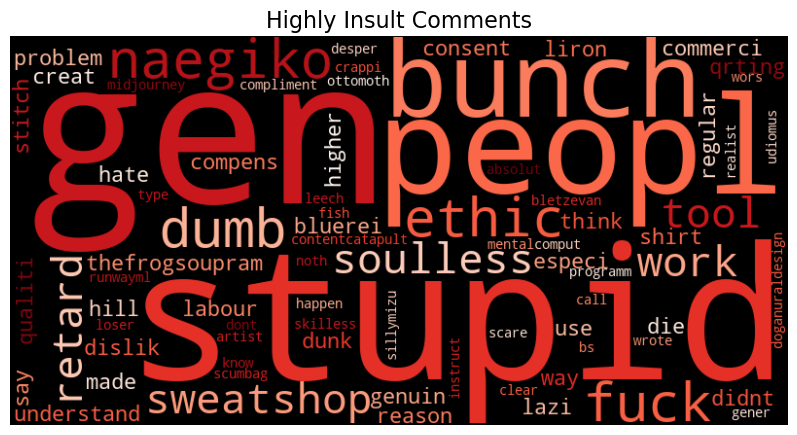

In [264]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.25  # Adjusted threshold

# Select high toxicity comments
high_insult_comments = test_df[test_df['predicted_insult'] > high_toxic_threshold]['text'].values
high_insult_text = " ".join(high_insult_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_insult_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_insult_text)
else:
    print("No high insult comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_insult_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Insult Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

# threat

In [265]:
print(test_df['predicted_threat'].describe())

count    342.000000
mean       0.005036
std        0.011232
min       -0.008568
25%       -0.000446
50%        0.002567
75%        0.005907
max        0.075041
Name: predicted_threat, dtype: float64


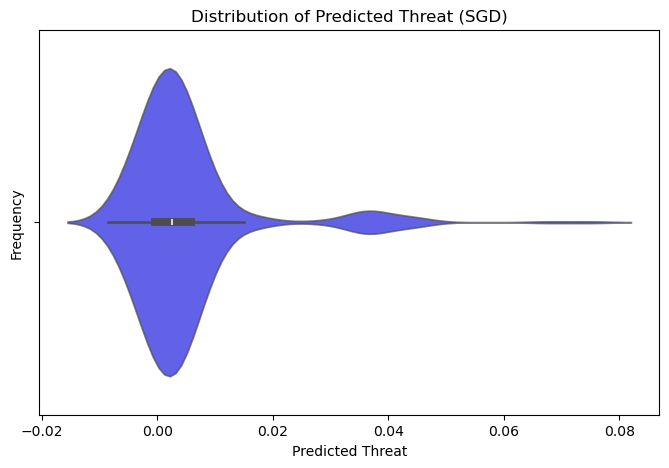

In [266]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=test_df['predicted_threat'], color='blue', alpha=0.7)
plt.title("Distribution of Predicted Threat (SGD)")
plt.xlabel("Predicted Threat")
plt.ylabel("Frequency")
plt.show()

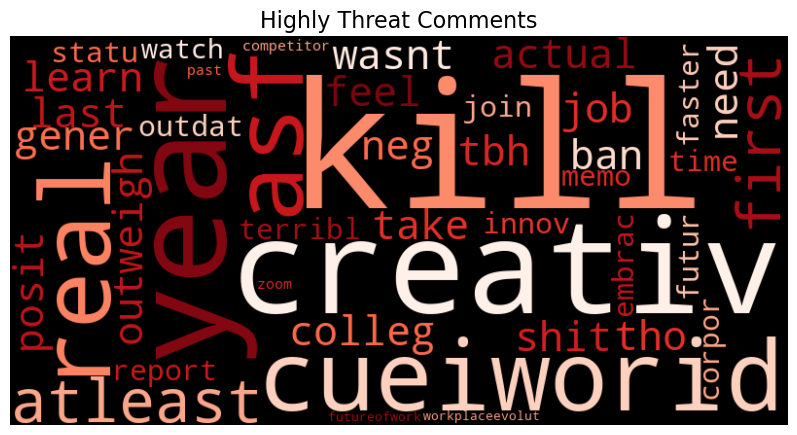

In [267]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Set thresholds for toxicity
high_toxic_threshold = 0.05  # Adjusted threshold

# Select high toxicity comments
high_threat_comments = test_df[test_df['predicted_threat'] > high_toxic_threshold]['text'].values
high_threat_text = " ".join(high_threat_comments)

# Custom stopwords: Add "ai" and "art" to default stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["ai", "art"])  # Add words to remove

# Check if text is empty before generating word clouds
if len(high_threat_text.strip()) > 0:
    # Generate word cloud for highly toxic comments
    high_toxic_wc = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        stopwords=custom_stopwords  # Apply custom stopwords
    ).generate(high_threat_text)
else:
    print("No high threat comments available for word cloud!")

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Plot highly toxic comments word cloud
if len(high_threat_text.strip()) > 0:
    plt.subplot(1, 2, 1)
    plt.title("Highly Threat Comments", fontsize=16)
    plt.imshow(high_toxic_wc, interpolation='bilinear')
    plt.axis("off")

plt.tight_layout()
plt.show()

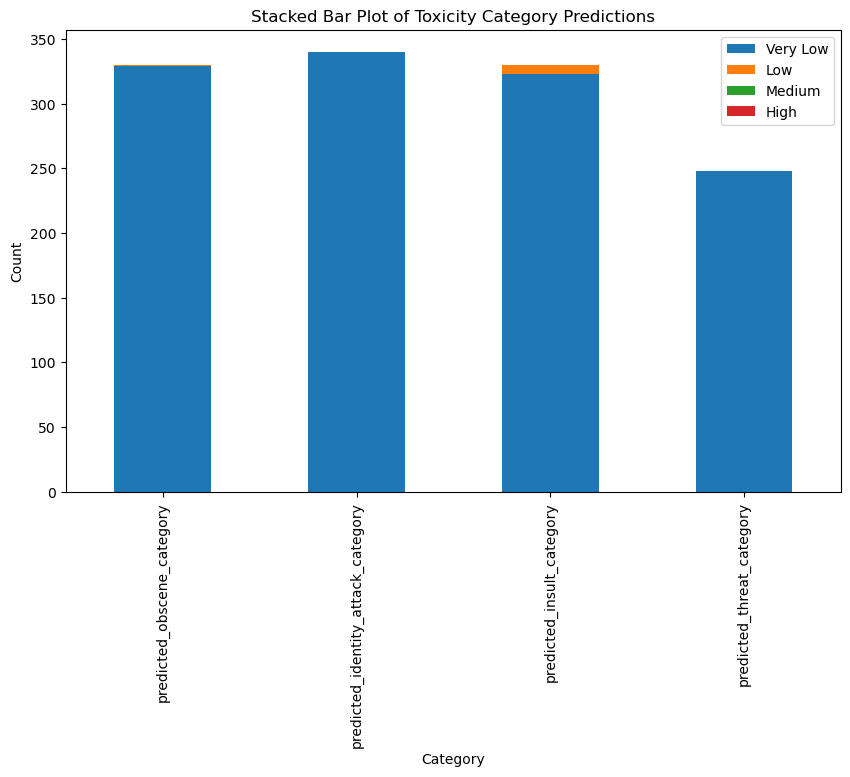

In [268]:
toxic_categories = ['predicted_obscene', 'predicted_identity_attack', 'predicted_insult', 'predicted_threat']

bins = [0, 0.2, 0.5, 0.8, 1.0]
labels = ['Very Low', 'Low', 'Medium', 'High']

for cat in toxic_categories:
    test_df[f'{cat}_category'] = pd.cut(test_df[cat], bins=bins, labels=labels)

category_columns = [f'{cat}_category' for cat in toxic_categories]
test_df[category_columns].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Toxicity Category Predictions')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

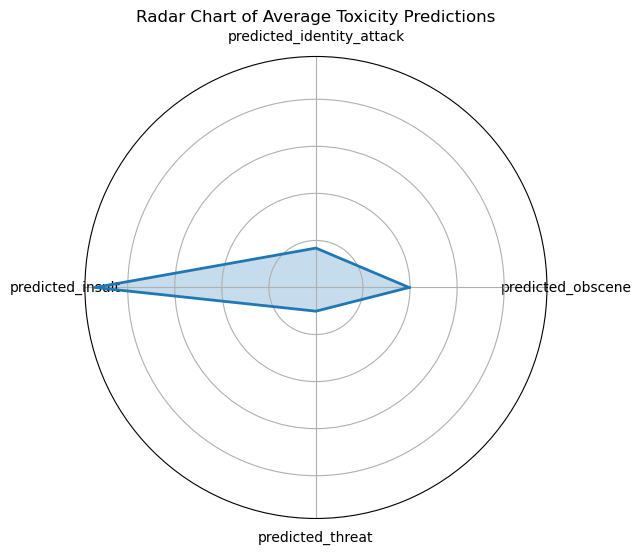

In [269]:
mean_values = test_df[toxic_categories].mean()

labels = toxic_categories
values = mean_values.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

values = np.concatenate((values, [values[0]]))  
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, alpha=0.25)
ax.plot(angles, values, linewidth=2)
ax.set_yticklabels([])  

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Radar Chart of Average Toxicity Predictions')
plt.show()

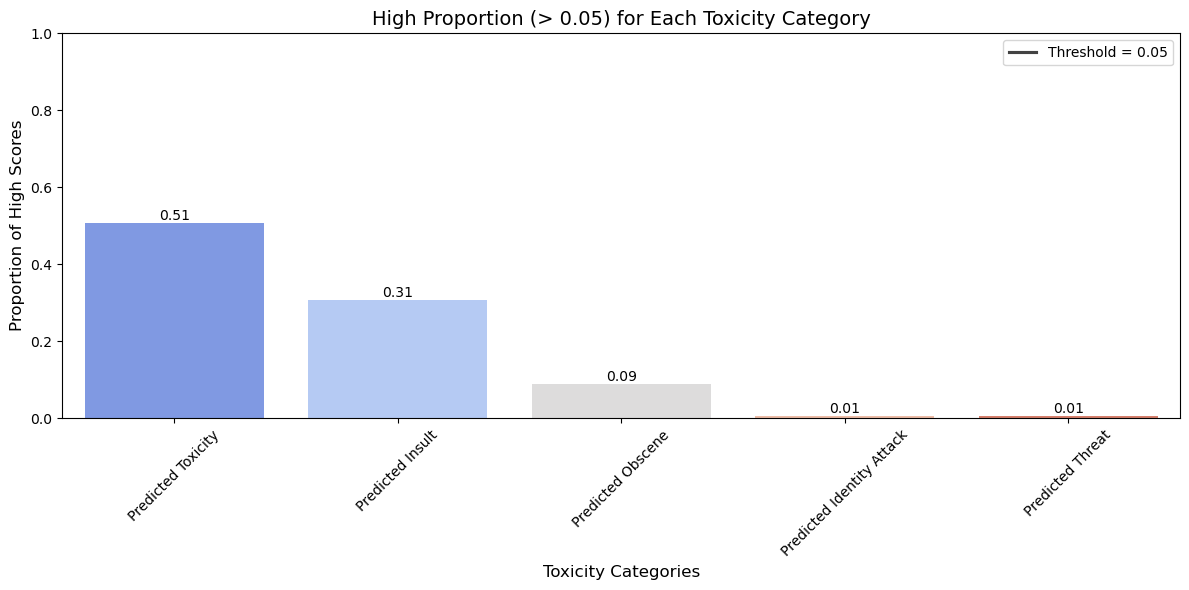

In [270]:
# Define the threshold
threshold = 0.05

# Toxic categories to analyze
toxic_categories = {
    'predicted_target': 'Predicted Toxicity',
    'predicted_obscene': 'Predicted Obscene',
    'predicted_identity_attack': 'Predicted Identity Attack',
    'predicted_insult': 'Predicted Insult',
    'predicted_threat': 'Predicted Threat'
}

# Calculate the high proportion for each category
high_proportions = {}
for category, label in toxic_categories.items():
    high_proportions[label] = (test_df[category] > threshold).mean()

# Convert to a sorted list for visualization
high_proportions_sorted = dict(sorted(high_proportions.items(), key=lambda x: x[1], reverse=True))

# Plot the high proportions
plt.figure(figsize=(12, 6))
bars = sns.barplot(
    x=list(high_proportions_sorted.keys()),
    y=list(high_proportions_sorted.values()),
    palette='coolwarm'
)

# Add titles and labels
plt.title("High Proportion (> 0.05) for Each Toxicity Category", fontsize=14)
plt.ylabel("Proportion of High Scores", fontsize=12)
plt.xlabel("Toxicity Categories", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add bar labels to show values
for bar in bars.patches:
    value = bar.get_height()
    bars.annotate(f"{value:.2f}", (bar.get_x() + bar.get_width() / 2, value), 
                  ha='center', va='bottom', fontsize=10, color='black')

# Add legend
plt.legend(["Threshold = 0.05"], loc='upper right', fontsize=10, frameon=True)

# Show plot
plt.tight_layout()
plt.show()

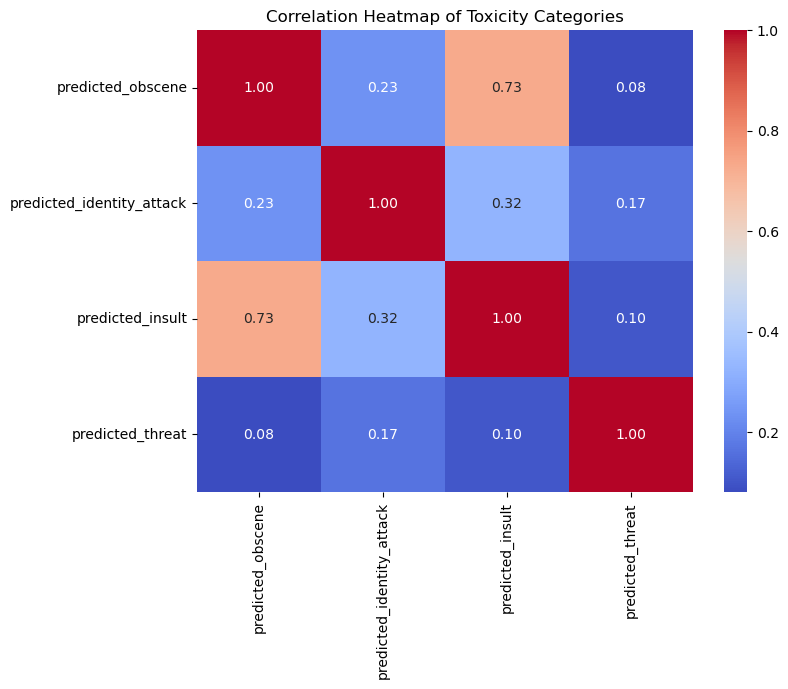

In [271]:
toxic_categories = ['predicted_obscene', 'predicted_identity_attack', 'predicted_insult', 'predicted_threat']

correlation_matrix = test_df[toxic_categories].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Toxicity Categories')
plt.show()

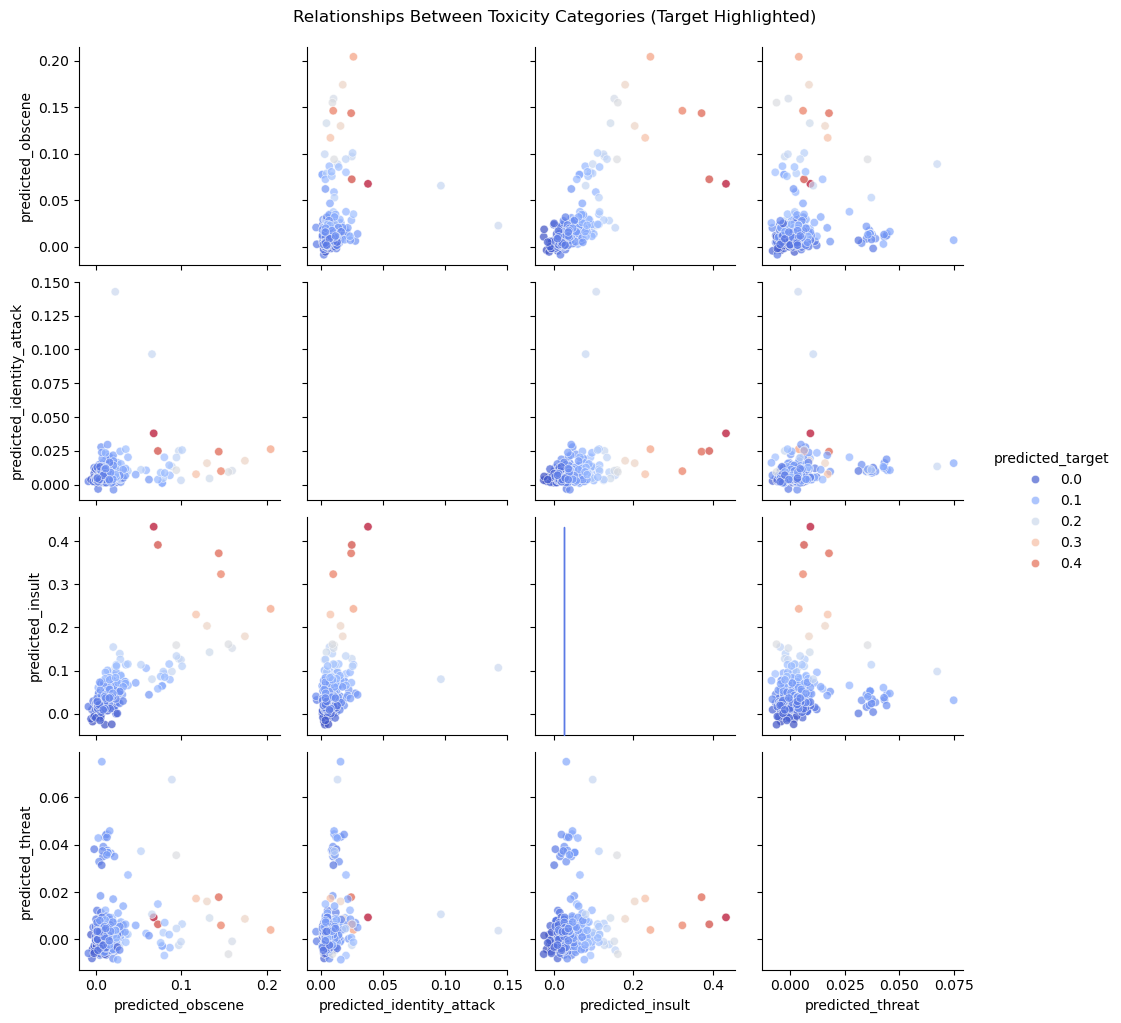

In [272]:
sns.pairplot(data=test_df, vars=toxic_categories, diag_kind='kde',
             hue='predicted_target', palette='coolwarm', plot_kws={'alpha': 0.7})
plt.suptitle("Relationships Between Toxicity Categories (Target Highlighted)", y=1.02)
plt.show()